In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


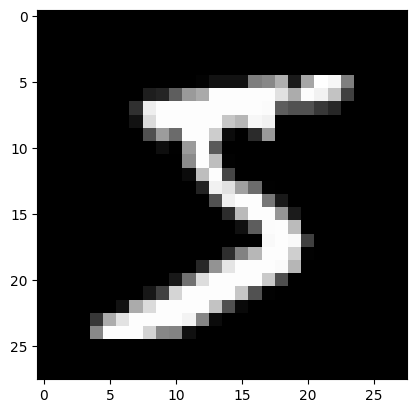

In [3]:
#Load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
plt.imshow(X_train[0], cmap='gray')

In [4]:
#Normalize the data
X_train = X_train / 255
X_test = X_test / 255

#Flatten the data
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [6]:
#Create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')    
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Monitor the model
model.summary()

#Tensorboard
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs")

#Train the model
model.fit(X_train, y_train, epochs=5, callbacks=[tensorboard_callback])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8733 - loss: 0.4548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9605 - loss: 0.1345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9735 - loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0483


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9722 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
tf.Tensor(
[[ 973    1    1    0    0    0    2    1    2    0]
 [   0 1126    2    0    0    1    2    1    3    0]
 [   4    3 1010    4    0    0    2    4    5    0]
 [   1    3   12  972    0    4    2    4    7    5]
 [   0    2    6    1  955    1    3    3    0   11]
 [   3    0    0    8    1  868    3    1    5    3]
 [   5    3    1    1    3    5  938    0    2    0]
 [   1    5   12    0    0    0    0 1002    1    7]
 [   7    1    7    3    4    4    8    3  933    4]
 [   2    5    1    4    9    2    1    6    2  977]], shape=(10, 10), dtype=int32)


Actual: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: 7


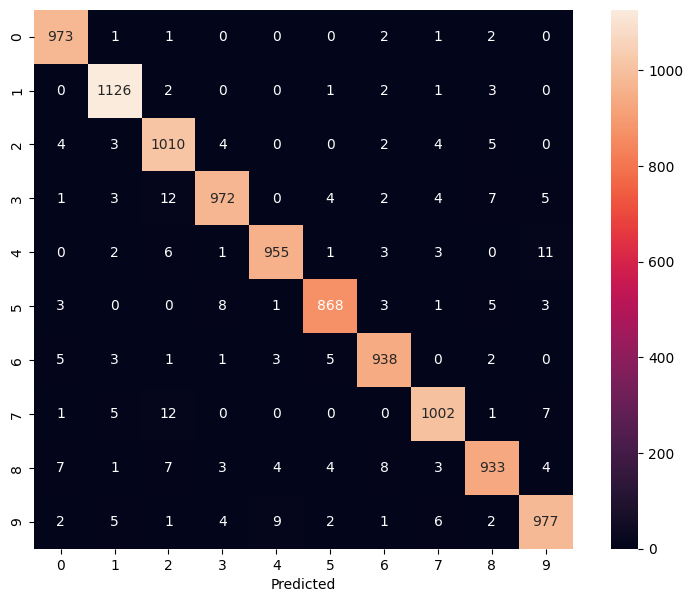

In [10]:
#Evaluate the model
model.evaluate(X_test, y_test)

#Predict
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

#Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

#Save the model
model.save('model.h5')


Actual: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: 0
Accuracy: 0.99999774


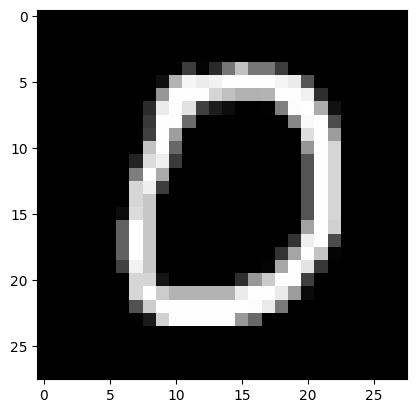

In [13]:
#Predict with an example
img = X_test[10]
print('Actual:', y_test[0])
plt.imshow(img, cmap='gray')
input = img.reshape(1, 28, 28)
output = model.predict(input)
print('Predicted:', np.argmax(output))
print('Accuracy:', np.max(output))

In [ ]:
|